In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams['figure.figsize'] = 12, 9
import string

In [3]:
lowerletters="abcdefghijklmnopqrstuvwxyz"
upperletters = lowerletters.upper()
englishfreq=[8.167,1.492, 2.782,4.253,12.702,2.228,2.015,6.094,6.966,0.153,0.772,4.025,2.406,6.749,7.507,1.929,0.095,5.987,6.327,9.056 
   ,2.758 ,0.978 ,2.361 ,0.150 ,1.974,0.074]

In [4]:
def getEncoder(key):
    """Returns a dictionary which maps each lowercase alphabet to the alphabet got by shifting it using the key.
    key : A singleton string describing the shift amount"""
    res = {}
    k = ord(key)-ord('a')
    for i in lowerletters:
        res[i] = chr((ord(i)-ord('a')+k)%26 + ord('a'))
    
    return res
    
getEncoder('c')

{'a': 'c',
 'b': 'd',
 'c': 'e',
 'd': 'f',
 'e': 'g',
 'f': 'h',
 'g': 'i',
 'h': 'j',
 'i': 'k',
 'j': 'l',
 'k': 'm',
 'l': 'n',
 'm': 'o',
 'n': 'p',
 'o': 'q',
 'p': 'r',
 'q': 's',
 'r': 't',
 's': 'u',
 't': 'v',
 'u': 'w',
 'v': 'x',
 'w': 'y',
 'x': 'z',
 'y': 'a',
 'z': 'b'}

In [5]:
def encrypt(ptext, key):
    """ Encrypts the plaintext using a caesar cipher with key
    ptext: Assumed to be a string
    key: Assumed to be a singleton string, i.e., one character string"""
    encode = getEncoder(key)
    ctext = ''
#     ptext = ptext.lower()
    for i in ptext:
        if i in lowerletters:
            ctext += encode[i]
        elif i in upperletters:
            ctext += encode[i.lower()].upper()
        else:
            ctext += i
    
    return ctext

In [6]:
def decrypt(ctext, key):
    """ Decrypts the ciphertext using a caesar cipher with key
    ctext: Assumed to be a string
    key: Assumed to be a singleton string, i.e., one character string"""
    return encrypt(ctext, chr(25-(ord(key)-ord('a'))+ord('a')+1))

In [7]:
def normalizeToPercent(l):
    """Normalizes the list of floats l to a percentage
    l: Assumed to be a list of floats"""
    total = sum(l)
    if total == 0:
        return
    for i in range(len(l)):
        l[i] = l[i]*100.0/total

In [8]:
def getFreq(text):
    """Returns a dictionary which represents the frequency of English characters in the string text.
    The keys are lowercase letters, but the case is ignored when frequency is measured."""
    freq={}
    text = text.lower()
    for i in lowerletters:
        freq[i] = 0
    for i in text:
        if i in lowerletters:
            freq[i] +=1
    
    return freq

In [9]:
def plotFreq(text):
    """Plots the frequency distribution of the string 'text' along with the standard English frequency distribution"""
    
    aDict = getFreq(text)
    l=[]
    for i in lowerletters:
        l.append(aDict[i])
    
    normalizeToPercent(l)
    
    wid = 1
    
    fig,ax = plt.subplots()
    rect1 = ax.bar(range(0,26*wid*3,wid*3), englishfreq, wid, color='purple')
    rect2 = ax.bar(range(wid,26*wid*3 + wid,wid*3), l,wid, color='g')
    
    ax.set_ylabel('Frequency Percent')
    ax.set_xlabel('Letter')
    ax.set_title('Frequency distribution of input string')
    ax.set_xticks(range(wid,26*wid*3 + wid,wid*3))
    ax.set_xticklabels(list(lowerletters))
    
    ax.legend( (rect1[0], rect2[0]), ('Standard English Frequency', 'Input Text Frequency') )
    
    plt.show() 

kdssb
{'a': 0, 'c': 0, 'b': 0, 'e': 1, 'd': 0, 'g': 1, 'f': 0, 'i': 1, 'h': 0, 'k': 0, 'j': 0, 'm': 0, 'l': 0, 'o': 0, 'n': 1, 'q': 0, 'p': 0, 's': 2, 'r': 1, 'u': 0, 't': 3, 'w': 0, 'v': 0, 'y': 0, 'x': 0, 'z': 0}

Random string plot:


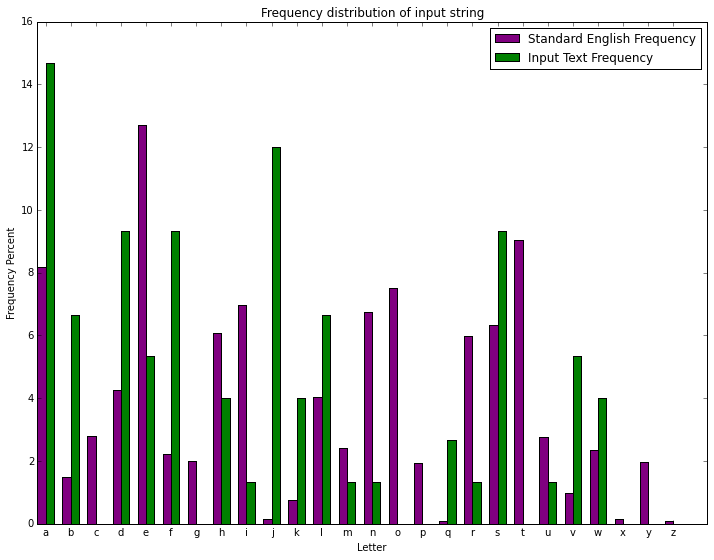


English string plot:


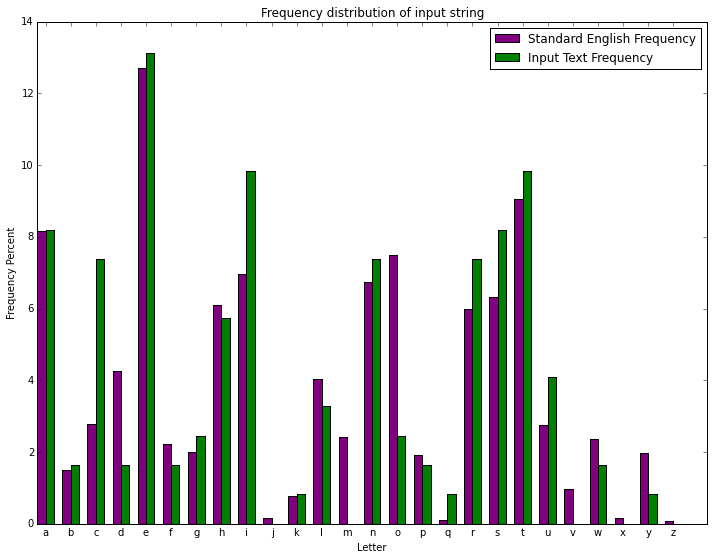

In [10]:
print encrypt("happy","d")
print getFreq("test string")
#plot([sin(x) for x in linspace(0,5)])
print '\nRandom string plot:'
plotFreq("ajabsdakjsdasvbdkfjvaeiwqeubfalsjhnfajsdfvwaljekfbsaldj,fbawljerhvlqhjfdamds")
print '\nEnglish string plot:'
plotFreq("This is a sentence written in the English language. It has a particular frequency distribution of letters which can be used to crack Caeser ciphers.")
#bar(range(26),dic.values())

Sample text frequency distribution:


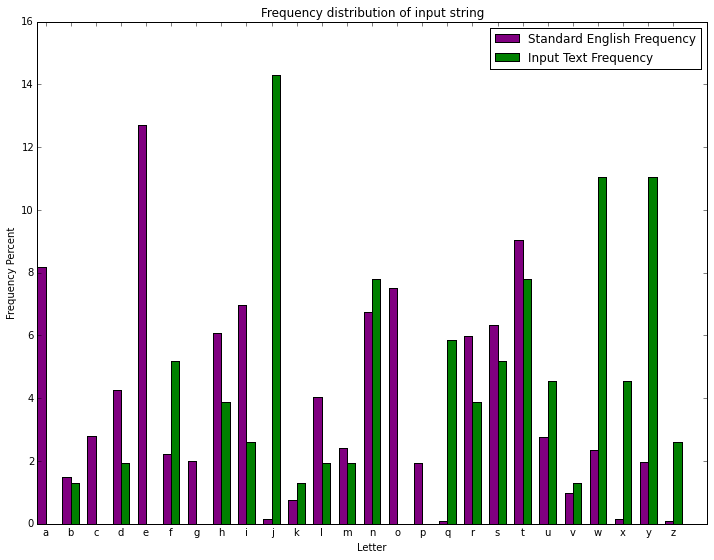

Decrypted text with previously known key:
The earliest forms of secret writing required little more than writing implements since most 
people could not read. More literacy, or literate opponents, required actual cryptography.

Decrypted text frequency distribution:


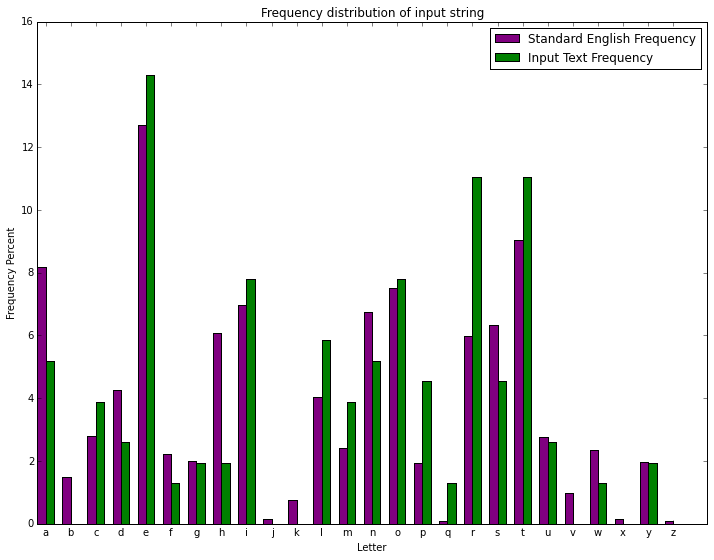

In [11]:
sampletext = """Ymj jfwqnjxy ktwrx tk xjhwjy bwnynsl wjvznwji qnyyqj rtwj ymfs bwnynsl nruqjrjsyx xnshj rtxy 
ujtuqj htzqi sty wjfi. Rtwj qnyjwfhd, tw qnyjwfyj tuutsjsyx, wjvznwji fhyzfq hwduytlwfumd."""
s1 = decrypt(sampletext,'f')
print 'Sample text frequency distribution:'
plotFreq(sampletext)
print 'Decrypted text with previously known key:'
print s1
print '\nDecrypted text frequency distribution:'
plotFreq(s1)

In [12]:
def decryptFreq(aDict, key):
    """Returns the frequency distribution obtained by decrypting the frequency distribution aDict using key.
    aDict : A dictionary whose keys are lowercase alphabet and values are ints
    key: A singleton string"""
    result = {}
    encode = getEncoder(key)
    for i in lowerletters:
        result[i] = aDict[encode[i]]
    
    return result
    
decryptFreq(getFreq(sampletext), 'a')

{'a': 0,
 'b': 2,
 'c': 0,
 'd': 3,
 'e': 0,
 'f': 8,
 'g': 0,
 'h': 6,
 'i': 4,
 'j': 22,
 'k': 2,
 'l': 3,
 'm': 3,
 'n': 12,
 'o': 0,
 'p': 0,
 'q': 9,
 'r': 6,
 's': 8,
 't': 12,
 'u': 7,
 'v': 2,
 'w': 17,
 'x': 7,
 'y': 17,
 'z': 4}

In [13]:
def getDeviation(aDict):
    """Get the mean square deviation of the input frequency distribution from the standard English frequency distribution.
    aDict : A dictionary whose keys are lowercase alphabet and values are ints"""
    freqlist = []
    for i in lowerletters:
        freqlist.append(aDict[i])
    
    normalizeToPercent(freqlist)
    return sum([(freqlist[x]-englishfreq[x])**2 for x in range(26)])/26.0

getDeviation(getFreq(decrypt(sampletext,'f')))

3.3845557310481733

In [14]:
def getAllDeviations(aDict):
    """Returns a dictionary whose keys are keys used to decrypt the frequency distribution defined by aDict, and values are the mean
    deviations of the resultant frequency distribution from the standard English frequency distribution.
    aDict : A dictionary whose keys are lowercase alphabet and values are ints"""
    result = {}
    for i in lowerletters:
        temp = decryptFreq(aDict,i)
        result[i] = getDeviation(temp)
    
    return result

print "Notice that the minimum deviation is for the key 'f'"
getAllDeviations(getFreq(sampletext))

Notice that the minimum deviation is for the key 'f'


{'a': 29.62986042635287,
 'b': 23.721418867911307,
 'c': 26.02306721955966,
 'd': 24.452038248530695,
 'e': 26.281608678101119,
 'f': 3.3845557310481733,
 'g': 24.26527501176745,
 'h': 28.812178108670555,
 'i': 30.084106180598617,
 'j': 16.984455830948271,
 'k': 30.068172114664552,
 'l': 26.457382903875342,
 'm': 27.676863423355865,
 'n': 27.31477551126795,
 'o': 28.410529757022196,
 'p': 24.893546740039184,
 'q': 16.091698588191033,
 'r': 23.224565721058163,
 's': 19.944046240538682,
 't': 28.583007279499725,
 'u': 19.19279748928993,
 'v': 25.99254773904018,
 'w': 25.507832454324898,
 'x': 32.509081205573651,
 'y': 26.010429856922297,
 'z': 29.206383902876347}

In [15]:
def crackCaesarCipher(ciphertext):
    """Cracks the Caeser cipher used to encrypt the ciphertext and returns the key.
    Returns: A singleton string with the key."""
    freq = getFreq(ciphertext)
    devs = getAllDeviations(freq)
    key='a'
    mindev = devs['a']
    for i in lowerletters:
        if devs[i]<mindev:
            mindev = devs[i]
            key = i
            
    return key

Results of encrypting text using a key and attempting to crack the cipher and get back the key:

Text used:
Cryptanalysis is the term used for the study of methods for obtaining the meaning of encrypted information 
without access to the key normally required to do so; i.e., it is the study of how to crack encryption algorithms or their implementations.


Frequency distribution of text used:


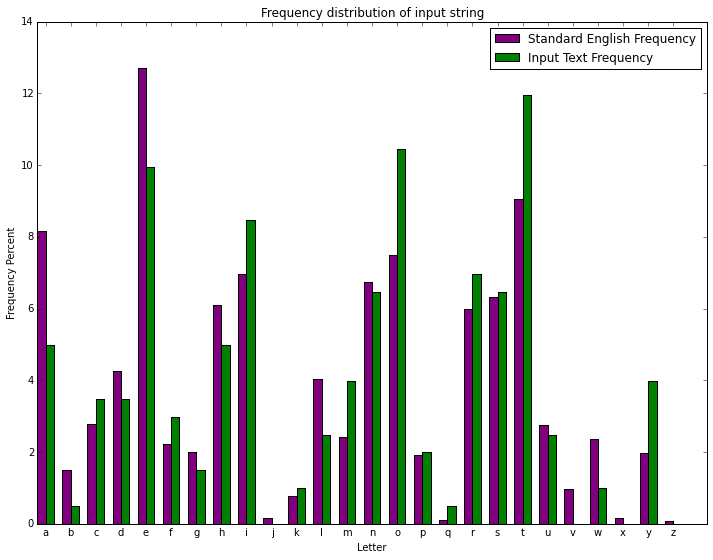

Key used: a	Key deciphered: a
Key used: b	Key deciphered: b
Key used: c	Key deciphered: c
Key used: d	Key deciphered: d
Key used: e	Key deciphered: e
Key used: f	Key deciphered: f
Key used: g	Key deciphered: g
Key used: h	Key deciphered: h
Key used: i	Key deciphered: i
Key used: j	Key deciphered: j
Key used: k	Key deciphered: k
Key used: l	Key deciphered: l
Key used: m	Key deciphered: m
Key used: n	Key deciphered: n
Key used: o	Key deciphered: o
Key used: p	Key deciphered: p
Key used: q	Key deciphered: q
Key used: r	Key deciphered: r
Key used: s	Key deciphered: s
Key used: t	Key deciphered: t
Key used: u	Key deciphered: u
Key used: v	Key deciphered: v
Key used: w	Key deciphered: w
Key used: x	Key deciphered: x
Key used: y	Key deciphered: y
Key used: z	Key deciphered: z


{'a': 2.0849275418887205,
 'b': 19.143748820112982,
 'c': 26.869849088004294,
 'd': 27.504024365463149,
 'e': 18.133607220419147,
 'f': 23.330239443917037,
 'g': 21.479340094510221,
 'h': 24.276201939133269,
 'i': 26.474671131632306,
 'j': 26.918452226159676,
 'k': 19.382363439324614,
 'l': 17.23414300304448,
 'm': 21.295030871395035,
 'n': 21.106588468027251,
 'o': 21.033836841544289,
 'p': 16.638926776484968,
 'q': 22.300694859148567,
 'r': 25.226144533851979,
 's': 29.574518050882212,
 't': 23.485042352451295,
 'u': 22.70658846802726,
 'v': 23.759324786435222,
 'w': 21.82430756485083,
 'x': 25.935788621108006,
 'y': 25.999699834272956,
 'z': 21.857296466496447}

In [16]:
sampletext2 = """Cryptanalysis is the term used for the study of methods for obtaining the meaning of encrypted information 
without access to the key normally required to do so; i.e., it is the study of how to crack encryption algorithms or their implementations."""

print "Results of encrypting text using a key and attempting to crack the cipher and get back the key:\n"
print "Text used:\n" +sampletext2+"\n"
print "\nFrequency distribution of text used:"
plotFreq(sampletext2)
for i in lowerletters:
    t = encrypt(sampletext2,i)
    print('Key used: '+i+'\tKey deciphered: '+crackCaesarCipher(t))

# t = encrypt(s,'j')
# print decrypt(t,'j')
getAllDeviations(getFreq(sampletext2))

In [17]:
def decipherText(ciphertext):
    """Deciphers the ciphertext assuming it has been encrypted using a Caeser cipher.
    Deciphering is done using frequency analysis.
    ciphertext : The ciphertext"""
    key = crackCaesarCipher(ciphertext)
    return decrypt(ciphertext,key)
    

Cipher text:
Tipgkfxirgyp gizfi kf kyv dfuvie rxv nrj vwwvtkzmvcp jpefepdflj nzky vetipgkzfe, kyv tfemvijzfe fw zewfidrkzfe wifd r ivrurscv jkrkv kf rggrivek efejvejv. Kyv fizxzerkfi fw re vetipgkvu dvjjrxv jyrivu kyv uvtfuzex kvtyezhlv evvuvu kf ivtfmvi kyv fizxzerc zewfidrkzfe fecp nzky zekveuvu ivtzgzvekj, kyvivsp givtcluzex lenrekvu gvijfej wifd ufzex kyv jrdv. Jzetv Nficu Nri Z reu kyv rumvek fw kyv tfdglkvi, kyv dvkyfuj ljvu kf triip flk tipgkfcfxp yrmv svtfdv zetivrjzexcp tfdgcvo reu zkj rggcztrkzfe dfiv nzuvjgivru.

Frequency distribution of cipher text:


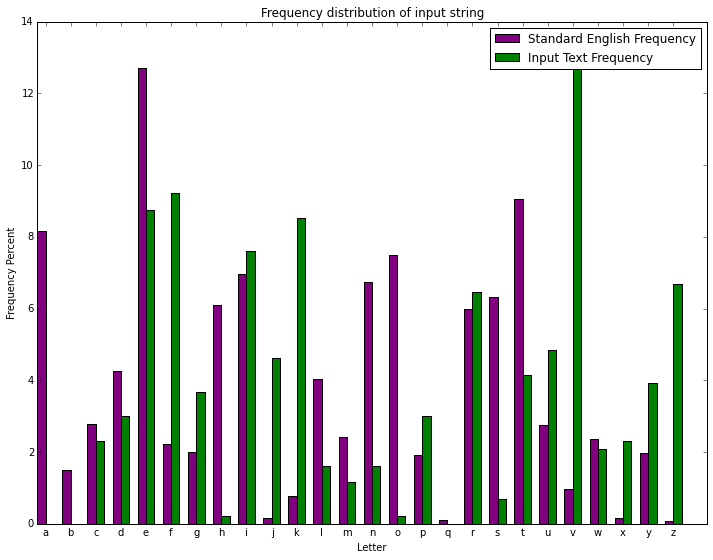


Deciphered text:
Cryptography prior to the modern age was effectively synonymous with encryption, the conversion of information from a readable state to apparent nonsense. The originator of an encrypted message shared the decoding technique needed to recover the original information only with intended recipients, thereby precluding unwanted persons from doing the same. Since World War I and the advent of the computer, the methods used to carry out cryptology have become increasingly complex and its application more widespread.

Key used: r

Frequency distribution of deciphered text:


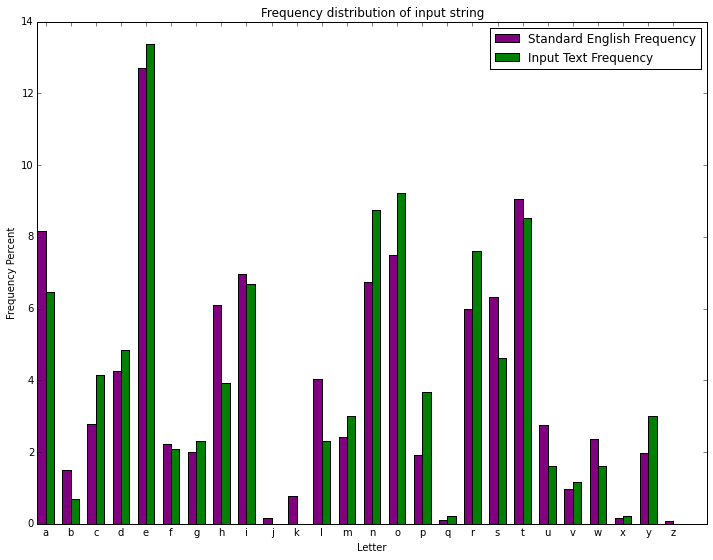

In [18]:
filecreatorIfNeeded = open("caeserCiphertext.txt", 'a+')
filecreatorIfNeeded.close()
ctextreader = open("caeserCiphertext.txt")
s = ctextreader.read()
ctextreader.close()

print "Cipher text:\n"+s
print "\nFrequency distribution of cipher text:"
plotFreq(s)
pt = decipherText(s)
print "\nDeciphered text:\n"+pt
print "\nKey used: "+crackCaesarCipher(s)
print "\nFrequency distribution of deciphered text:"
plotFreq(pt)

In [19]:
# %timeit crackCaesarCipher(s)

In [20]:
def polyEncrypt(ptext,key):
    """Encrypts the plaintext using a Vigenere cipher with the key.
    ptext, key: Strings"""
    l = len(key)
    result = ''
    c=0
    for i in ptext:
        if i in string.letters:
            result+=encrypt(i,key[c%l])
            c+=1
        else:
            result+=i
    
    return result

polyEncrypt('ATTACK ATDAWN',"lemon")

'LXFOPV EFRNHR'

In [21]:
def polyDecrypt(ctext, key):
    """Decrypts the ciphertext using a Vigenere cipher with the key.
    ptext, key: Strings"""
    dkey = ''
    for i in key:
        dkey += chr(25-(ord(i)-ord('a'))+ord('a')+1)
    
    return polyEncrypt(ctext,dkey)

polyDecrypt('LXFOPV EF RNHR', 'lemon')

'ATTACK AT DAWN'

In [22]:
def splitForKeyLength(intext, keylength):
    """Splits the input text into keylength number of strings. Each string contains the characters which would be
    encrypted by each character of a key whose length is keylength
    intext: String
    keylength: int"""
    strs = []
    for i in range(keylength):
        strs.append('')
    
    c=0
    for i in intext:
        if i in string.letters:
            strs[c%keylength]+=i
            c+=1
    
    return strs

splitForKeyLength('ATTACKATDAWN',5)

['AKW', 'TAN', 'TT', 'AD', 'CA']

In [23]:
def crackVigenereCipher(ciphertext, keylength):
    """Cracks the Vigenere cipher in the ciphertext, assuming the key has a length of keylength
    Returns a tuple of the key decoded and the deviation obtained from decrypting the text with that key.
    ciphertext: String
    keylength: int"""
    strs = splitForKeyLength(ciphertext, keylength)
    key = ''
    for i in strs:
        key += crackCaesarCipher(i)
    
    
    ptex = polyDecrypt(ciphertext, key)
    return (key, getDeviation(getFreq(ptex)))


In [24]:
def decipherTextVigenere(ciphertext):
    """Cracks the Vigenere cipher in the ciphertext, and returns the decrypted text.
    Assumes the key has length between 1 and 20.
    ciphertext: String"""
    results = []
    for i in range(1,21,1):
        results.append(crackVigenereCipher(ciphertext,i))
    
    mindev = results[0][1]
    minkey = results[0][0]
    for i in results:
        if i[1]<mindev:
            mindev = i[1]
            minkey = i[0]
    
    print "Key: " + minkey
    return polyDecrypt(ciphertext, minkey)

In [25]:
filecreatorIfNeeded2 = open("vigenereCiphertext.txt", 'a+')
filecreatorIfNeeded2.close()
ctext = open("vigenereCiphertext.txt")
vs = ctext.read()
ctext.close()

Cipher text:
Elq qboi kch sehs ocswsa tw mb rieydyp sr hup zuuryids ptttse hluqu hee dhe mz wgd jubnw jafz mc fvr qvqbps hudyzqmh Oweugr oi Hwtprqfr. Tx ug ny ijozapq cs l tazllpbvnmifwp nmbvrc, mz cgsid kbche hup gudupv ug pzrehnyxxm psezuvyk. Fvr mvuzytezh pzhq knd ihsaeymzyj fdcxpr nm gsi rozzye sarmzsrc, Gtoewie Pnmfmur.

Frequency distribution of cipher text:


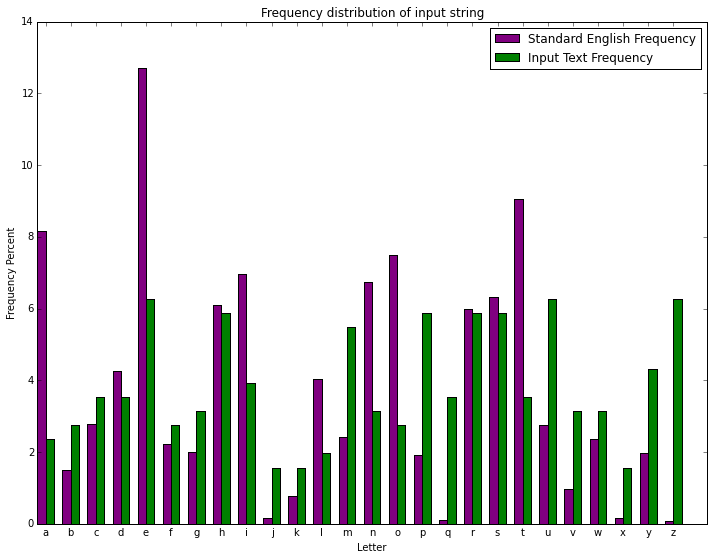

In [26]:
print "Cipher text:\n"+vs
print "\nFrequency distribution of cipher text:"
plotFreq(vs)

### The above graph shows the effectiveness of the Vigenere Cipher.
The frequency distribution of the cipher text is nearly uniform, and therefore a simple frequency analysis will not 
yield results.
The method used to crack the Vigenere Cipher is to analyse the frequency distribution of every nth character, where n is the 
length of the key used. However, one cannot ascertain this keylength easily. A first approach is to attempt to break the code by using
all the key lengths upto a certain limit, say 20, and comparing the deviations obtained from each length of the key.

Key: lemonleqonleqzg
Deciphered text:
The code uou hart iroken is wn exaiese of the vegenent jipher whech wao ebt in its fenal fkgt by the franch deesomat Blaese de Rxnenere. It es an etptple of a pklyallwhbetic cilher, ij daher wordo the ceeoer is conotanthn jhanging. Phe breasiant coda was ertutually bnoken xn ahe famouo engijtlr, Charleo Babbwvl.

Frequency distribution of deciphered text:


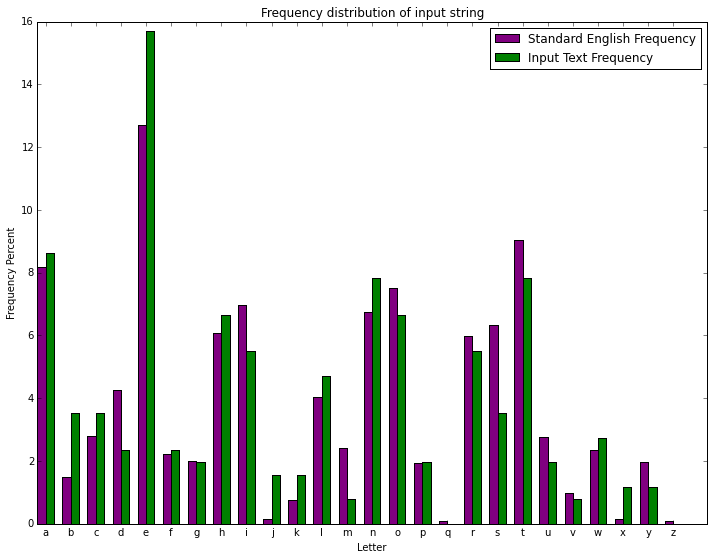

In [27]:
ptex = decipherTextVigenere(vs)
print "Deciphered text:\n"+ptex
print "\nFrequency distribution of deciphered text:"
plotFreq(ptex)

#####This result shows that the previously mentioned method is also flawed
The failure of the method to always yield the correct result is caused by two reasons:
* The cipher text is too small for frequency analysis.
* The individual cracking of Caeser ciphers may not yield the best result when the whole key is taken together. The variable key length can also cause repitition of the same keyword multiple times, but with slight differences due to the above reason.

One way to improve the method is to find the most probable keylength through some other means and not brute force through each keylength.

In [28]:
def purgePunc(s):
    """Returns the string s, with all non-alphabetic characters removed"""
    result = ''
    for i in s:
        if i in string.ascii_letters:
            result+=i
    
    return result

print purgePunc("Punc,tuati\'on, is:,every;whe(r10e)")

Punctuationiseverywhere


In [29]:
def getRepeatDistances(s):
    """Returns the distances between repeating sequences of 3 characters in s
    Example: 'ABCGHJABCGIIHJA' returns [6,6,8]
    The repeating sequences are ABC, BCG and HJA"""
    s = purgePunc(s)
    l = len(s)
    result = []
    words = [s[i:i+3] for i in range(l)]
    for i in range(l):
        for j in range(i+1,l,1):
            if words[i]==words[j]:
                result.append(j-i)
            
    return result


print getRepeatDistances('RIKVBIYBITHUSEVAZMMLTKASRNHPNPZICSWDSVMBIYFQEZUBZPBRGYNTBURMBECZQKBMBPAWIXSOFNUZECNRAZFPHIYBQEOCTTIOXKUNOHMRGCNDDXZWIRDVDRZYAYYICPUYDHCKXQIECIEWUICJNNACSAZZZGACZHMRGXFTILFNNTSDAFGYWLNICFISEAMRMORPGMJLUSTAAKBFLTIBYXGAVDVXPCTSVVRLJENOWWFINZOWEHOSRMQDGYSDOPVXXGPJNRVILZNAREDUYBTVLIDLMSXKYEYVAKAYBPVTDHMTMGITDZRTIOVWQIECEYBNEDPZWKUNDOZRBAHEGQBXURFGMUECNPAIIYURLRIPTFOYBISEOEDZINAISPBTZMNECRIJUFUCMMUUSANMMVICNRHQJMNHPNCEPUSQDMIVYTSZTRGXSPZUVWNORGQJMYNLILUKCPHDBYLNELPHVKYAYYBYXLERMMPBMHHCQKBMHDKMTDMSSJEVWOPNGCJMYRPYQELCDPOPVPBIEZALKZWTOPRYFARATPBHGLWWMXNHPHXVKBAANAVMNLPHMEMMSZHMTXHTFMQVLILOVVULNIWGVFUCGRZZKAUNADVYXUDDJVKAYUYOWLVBEOZFGTHHSPJNKAYICWITDARZPVU')


[35, 84, 357, 385, 525, 385, 420, 420, 266, 322, 210, 224, 56, 56, 343, 343, 516, 175, 175, 413, 266, 410, 179, 259, 266, 379, 308, 329, 351, 277, 344, 208, 35, 140, 63, 137, 104, 7, 22]


In [30]:
def getFirstFactors(n):
    """Returns a list of factors of n, under 20.
    n: int"""
    return [x for x in range(2,21,1) if n%x==0]
        
getFirstFactors(200)

[2, 4, 5, 8, 10, 20]

In [31]:
def getProbableKeyLength(ciphertext):
    """Returns the probable length of the vigenere cipher key used to create the given cipher text.
    The most probable key length is the number which is the most common factor of the repeat distances
    in the ciphertext. Assumes the key length is less than or equal to 20"""
    dists = getRepeatDistances(ciphertext)
    dic = {2:0}
    for i in dists:
        facts = getFirstFactors(i)
        for j in facts:
            dic[j]=dic.get(j,0)+1
    
    maxKey = 2
    maxVal = dic[2]
    for i in dic.keys():
        if dic[i]>maxVal:
            maxVal = dic[i]
            maxKey = i
    
    return maxKey
        

In [32]:
keylen = getProbableKeyLength(vs)
print "Most probable key length: "+str(keylen)
key1 = crackVigenereCipher(vs,keylen)
print "\nCracked key of that length: "+key1[0]
print "\nCipher text:\n"+vs
print "\nDeciphered text:\n"+polyDecrypt(vs,key1[0])

Most probable key length: 5

Cracked key of that length: lemon

Cipher text:
Elq qboi kch sehs ocswsa tw mb rieydyp sr hup zuuryids ptttse hluqu hee dhe mz wgd jubnw jafz mc fvr qvqbps hudyzqmh Oweugr oi Hwtprqfr. Tx ug ny ijozapq cs l tazllpbvnmifwp nmbvrc, mz cgsid kbche hup gudupv ug pzrehnyxxm psezuvyk. Fvr mvuzytezh pzhq knd ihsaeymzyj fdcxpr nm gsi rozzye sarmzsrc, Gtoewie Pnmfmur.

Deciphered text:
The code you have broken is an example of the vigenere cipher which was put in its final form by the french diplomat Blaise de Vigenere. It is an example of a polyalphabetic cipher, in other words the cipher is constantly changing. The brilliant code was eventually broken by the famous engineer, Charles Babbage.


#####Thus, using the analysis of repeat distances and their common factors is more effective.
This method allows us to reliably obtain the correct keylength, and using this keylength the cipher can be cracked more effectively.